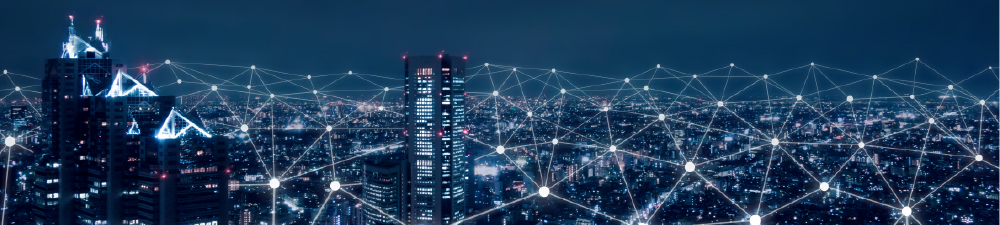

# Mini Project 3  - IU 4.6 Machine Learning

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading data and initial processing

In [2]:
# Edit the file location of raw data set

# Read file to variable 'cust_df'
cust_df=pd.read_csv("Mini project 3 Data.csv")

cust_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


## Exercise

## Placeholder for your analysis

In [3]:
# Type your code here to explore and understand the data better

#e.g., identify the dimension of cust_df
cust_df.shape

# Identify the columns of the dataframe
cust_df.columns




(51047, 58)

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

In [4]:
# Checking uniqueness of customers
cust_df['CustomerID'].nunique()/cust_df.shape[0]

1.0

In [5]:
# Checking if the target variable is equally represented

cust_df['Churn'].value_counts()

#in percentage
100*cust_df['Churn'].value_counts()/cust_df.shape[0]

No     36336
Yes    14711
Name: Churn, dtype: int64

No     71.18146
Yes    28.81854
Name: Churn, dtype: float64

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [6]:
#How many customers had zero monthly revenue?
#Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis
cust_df[cust_df['MonthlyRevenue']==0].shape[0]
cust_df=cust_df[cust_df['MonthlyRevenue']>0]

## excluding customers with zero monthly minutes from cust_df
cust_df = cust_df[cust_df["MonthlyMinutes"]>0.0]


6

### Q1.2 How many columns has missing values percentage > 5%

In [7]:
#Calculate for each column % of missing value in the data
#How many columns has missing values percentage > 5%
#What strategy should be used for imputation?

100*cust_df.isnull().sum()/cust_df.shape[0]

#Drop rows with missing data
cust_df.dropna(axis=0,inplace=True)
cust_df.shape[0]

CustomerID                   0.000000
Churn                        0.000000
MonthlyRevenue               0.000000
MonthlyMinutes               0.000000
TotalRecurringCharge         0.000000
DirectorAssistedCalls        0.000000
OverageMinutes               0.000000
RoamingCalls                 0.000000
PercChangeMinutes            0.344883
PercChangeRevenues           0.344883
DroppedCalls                 0.000000
BlockedCalls                 0.000000
UnansweredCalls              0.000000
CustomerCareCalls            0.000000
ThreewayCalls                0.000000
ReceivedCalls                0.000000
OutboundCalls                0.000000
InboundCalls                 0.000000
PeakCallsInOut               0.000000
OffPeakCallsInOut            0.000000
DroppedBlockedCalls          0.000000
CallForwardingCalls          0.000000
CallWaitingCalls             0.000000
MonthsInService              0.000000
UniqueSubs                   0.000000
ActiveSubs                   0.000000
ServiceArea 

49078

<mark>__Result:__
    
Since the amount of missing values is small, suggest to drop rows with missing data.

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

<AxesSubplot:>

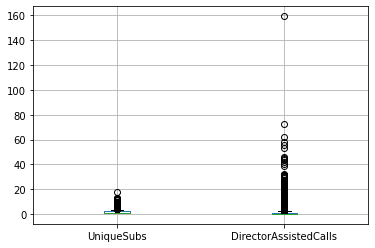

In [8]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

5.0

9.65

<AxesSubplot:>

(48399, 58)

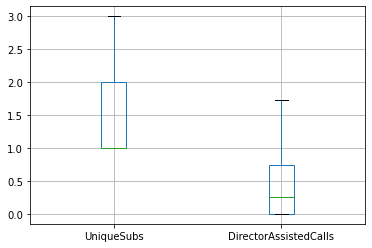

In [9]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again

#Identifying the 99 percentile values of the columns
US99 = np.percentile(cust_df['UniqueSubs'],99)
DAC99 = np.percentile(cust_df['DirectorAssistedCalls'],99)
US99
DAC99

cust_df = cust_df[(cust_df['UniqueSubs'] <= US99) & (cust_df['DirectorAssistedCalls'] <= DAC99)]
cust_df[['UniqueSubs', 'DirectorAssistedCalls']].boxplot(sym='');
cust_df.shape

## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

In [10]:
cust_df.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

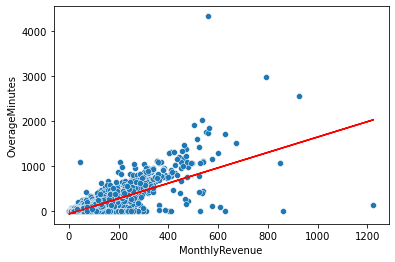

In [11]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df )

# Import linregress
from scipy.stats import linregress

#add line of best fit
slope, intercept, r_value, p_value, std_err = linregress(cust_df['MonthlyRevenue'],cust_df['OverageMinutes']);
plt.plot(cust_df['MonthlyRevenue'],slope*cust_df['MonthlyRevenue']+intercept,'r');

<mark>__Result:__
    
Based on Pearsons Coefficient at 0.783, there seems to be  a strong positive correlation relationship between the two variables.

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

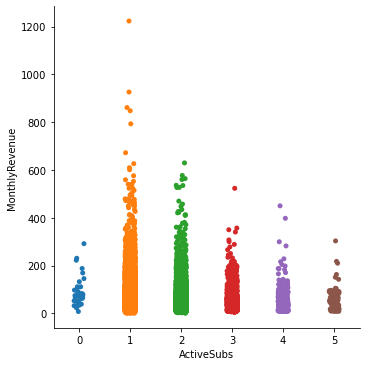

In [12]:
#use category plot to plot monthly revenue for each active subs category
sns.catplot(x="ActiveSubs",y="MonthlyRevenue",data = cust_df ) 

<mark>__Result:__
    
The graph shows a decreasing trend.

The more active subcriptions a customer has, the lower the monthly revenue.

### Q2.3 Does credit rating have an impact in churn rate?

In [13]:
pd.crosstab(cust_df.Churn, cust_df.CreditRating).apply(lambda r: r/r.sum(), axis=0)
pd.crosstab(cust_df.Churn, cust_df.CreditRating).apply(lambda r: r/r.sum(), axis=1)

CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,0.69872,0.703981,0.697558,0.745779,0.786099,0.739027,0.718026
Yes,0.30128,0.296019,0.302442,0.254221,0.213901,0.260973,0.281974


CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,0.161832,0.370971,0.160279,0.109317,0.138640,0.017927,0.041034
Yes,0.177695,0.397230,0.176962,0.094893,0.096065,0.016121,0.041035


<mark>__Result:__
    
Above analysis is inconclusive as it seems that people are churning in all categories about 20-30% with a highest churn rate when credit rating is highest.

### Placeholder for additional exploratory analysis

<AxesSubplot:>

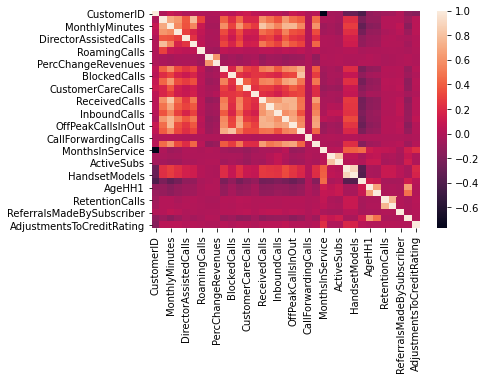

In [14]:
#type your code here for any additional exploratory analysis (if any)

cust_df_num=cust_df.select_dtypes(include=np.number)
sns.heatmap(data=cust_df_num.corr())

## Q3. Create additional features to help predict churn

In [15]:
#wrapper function to create additional features for churn prediction
def create_features(cust_df):
    
    #3.1 Percent of current active subs over total subs
#     cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    cust_df['perc_recurrent_charge']= cust_df['TotalRecurringCharge'] / cust_df["MonthlyRevenue"]
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    cust_df['perc_overage_minute']= cust_df['OverageMinutes'] / cust_df["MonthlyMinutes"]
    
    #type your code here to creat any other additional features which you think will help improve your model accuracy
    #3.4 Percent of RoamingCalls minutes over total monthly minutes
    cust_df['perc_Roaming_Calls']= cust_df['RoamingCalls'] / cust_df["MonthlyMinutes"]

    #3.5 Percent of DroppedCalls minutes over total monthly minutes
    cust_df['perc_Dropped_Calls']= cust_df['DroppedCalls'] / cust_df["MonthlyMinutes"]
    
    #3.6 Percent of BlockedCalls minutes over total monthly minutes
    cust_df['perc_Blocked_Calls ']= cust_df['BlockedCalls'] / cust_df["MonthlyMinutes"]
    
    #3.7 Percent of UnansweredCalls minutes over total monthly minutes
    cust_df['perc_Unanswered_Calls']= cust_df['UnansweredCalls'] / cust_df["MonthlyMinutes"]
    
    #3.8 Percent of CustomerCareCalls minutes over total monthly minutes
    cust_df['perc_Customer_Care_Calls']= cust_df['CustomerCareCalls'] / cust_df["MonthlyMinutes"]
    
    #3.9 Percent of ThreewayCalls minutes over total monthly minutes
    cust_df['perc_Threeway_Calls']= cust_df['ThreewayCalls'] / cust_df["MonthlyMinutes"]
    
    #3.10 Percent of ReceivedCalls minutes over total monthly minutes
    cust_df['perc_Received_Calls']= cust_df['ReceivedCalls'] / cust_df["MonthlyMinutes"]
    
    #3.11 Percent of OutboundCalls minutes over total monthly minutes
    cust_df['perc_OutboundCalls']= cust_df['OutboundCalls'] / cust_df["MonthlyMinutes"]
    
    #3.12 Percent of InboundCalls minutes over total monthly minutes
    cust_df['perc_Inbound_Calls']= cust_df['InboundCalls'] / cust_df["MonthlyMinutes"]
    
    #3.13 Percent of PeakCallsInOut minutes over total monthly minutes
    cust_df['perc_PeakCalls_InOut']= cust_df['PeakCallsInOut'] / cust_df["MonthlyMinutes"]
    
    #3.14 Percent of OffPeakCallsInOut minutes over total monthly minutes
    cust_df['perc_Off_PeakCalls_InOut']= cust_df['OffPeakCallsInOut'] / cust_df["MonthlyMinutes"]
    
    #3.15 Percent of OffPeakCallsInOut minutes over total monthly minutes
    cust_df['perc_Off_PeakCalls_InOut']= cust_df['OffPeakCallsInOut'] / cust_df["MonthlyMinutes"]
    
    return cust_df  


In [16]:
#Make a call to the feature engineering wrapper function for churn prediction
cust_df=create_features(cust_df)


In [17]:
#Determine the categorical columns
cust_col=cust_df.select_dtypes(include='object')
cust_col.columns

#Determine the numerical columns
cust_num=cust_df.select_dtypes(include=np.number)
cust_num.columns

Index(['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus'],
      dtype='object')

Index(['CustomerID', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls',
       'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'AdjustmentsToCreditRating', 'perc_recurrent_charge',
       'perc_overage_minute', 'perc_Roaming_Calls', 'perc_Dropped_Calls',
       'perc_Blocked_Calls ', 'perc_Unanswered_Calls',
       'perc_Customer_Care_Calls', 'perc_Threeway_Calls',
       'perc_Received_Calls', 'perc_OutboundCalls', '

In [18]:
# Use Chi2 test to filter out categorical variables with no impact on Churn (target variable)


def check_categorical_imp(cust_df,categorical_col):
    new_categorical_col = []
    for i in categorical_col:
        if stats.chi2_contingency(pd.crosstab(cust_df.Churn, cust_df[i]))[1] > 0.05:
            pass
        else:
            new_categorical_col.append(i)
            
    return new_categorical_col

check_categorical_imp(cust_col,cust_col.columns)

['Churn',
 'ServiceArea',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'HasCreditCard',
 'HandsetPrice',
 'MadeCallToRetentionTeam',
 'CreditRating',
 'PrizmCode',
 'MaritalStatus']

In [19]:
#Obtain the new categorical df with non-important features excluded

cust_col=cust_col[check_categorical_imp(cust_col,cust_col.columns)]

In [20]:
#Replace Churn as numbers
cust_df["Churn"]=cust_df["Churn"].replace([ "Yes",  "No"],  [1,0])

#Count the number of churners and non churners
class_count_0, class_count_1 = cust_df['Churn'].value_counts()

# Split the df into churners and non churners
class_0 = cust_df[cust_df['Churn'] == 0]
class_1 = cust_df[cust_df['Churn'] == 1]# print the shape of the class

#To upsample non-churners df as it is inherently under represented
class_1_over = class_1.sample(class_count_0, replace=True)

# Create the new col df with the proportion adjusted
test_over = pd.concat([class_1_over, class_0], axis=0)

# Check that churners and non-churners are equally represented
cust_df = test_over
y = cust_df.Churn
y.value_counts()/len(y)*100


0    50.0
1    50.0
Name: Churn, dtype: float64

In [21]:
contlist=list(cust_num.columns)
cust_df[contlist].dtypes
contlist.pop(0)
contlist

CustomerID                     int64
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
Handsets                     float64
HandsetModels                float64
C

'CustomerID'

['MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'DroppedCalls',
 'BlockedCalls',
 'UnansweredCalls',
 'CustomerCareCalls',
 'ThreewayCalls',
 'ReceivedCalls',
 'OutboundCalls',
 'InboundCalls',
 'PeakCallsInOut',
 'OffPeakCallsInOut',
 'DroppedBlockedCalls',
 'CallForwardingCalls',
 'CallWaitingCalls',
 'MonthsInService',
 'UniqueSubs',
 'ActiveSubs',
 'Handsets',
 'HandsetModels',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2',
 'RetentionCalls',
 'RetentionOffersAccepted',
 'ReferralsMadeBySubscriber',
 'IncomeGroup',
 'AdjustmentsToCreditRating',
 'perc_recurrent_charge',
 'perc_overage_minute',
 'perc_Roaming_Calls',
 'perc_Dropped_Calls',
 'perc_Blocked_Calls ',
 'perc_Unanswered_Calls',
 'perc_Customer_Care_Calls',
 'perc_Threeway_Calls',
 'perc_Received_Calls',
 'perc_OutboundCalls',
 'perc_Inbound_Calls',
 'perc_PeakCalls_InOut',
 'perc_Off_PeakCalls_InOut']

## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [22]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


## scaling all continous variable from the dataframe
cust_df[contlist] = sc.fit_transform(cust_df[contlist])

sc.fit(cust_df[contlist])
cust_df[contlist] = sc.transform(cust_df[contlist])

StandardScaler()

In [23]:
#Create dummy variables for all categorical variables

cols=list(cust_col.columns)
cols.pop(0)

cust_df = pd.get_dummies(cust_df, columns=cols)

cust_df

'Churn'

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,CreditRating_5-Low,CreditRating_6-VeryLow,CreditRating_7-Lowest,PrizmCode_Other,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,MaritalStatus_No,MaritalStatus_Unknown,MaritalStatus_Yes
31761,3252982,1,-0.164538,0.046654,-0.271162,-0.181230,0.220645,-0.129207,0.572243,0.899069,...,0,0,0,1,0,0,0,1,0,0
14349,3113046,1,-0.711041,-0.900053,-0.708061,-0.541917,-0.237057,-0.129207,0.327189,0.446562,...,0,0,0,1,0,0,0,0,0,1
38836,3309814,1,-0.092978,-0.028765,0.602636,-0.008100,-0.426835,0.191483,-0.489659,-0.051196,...,0,0,0,1,0,0,0,0,0,1
50208,3393458,1,-0.568865,-0.697613,-0.708061,0.352586,-0.437999,0.015621,-0.081235,-0.075012,...,0,1,0,0,0,1,0,1,0,0
39618,3315806,1,0.263879,1.074734,-0.052713,-0.541917,0.443914,-0.129207,-1.310396,-1.620679,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51030,3399870,0,0.310405,0.149859,-0.052713,0.172243,0.678346,-0.129207,0.416653,0.946701,...,0,0,0,1,0,0,0,1,0,0
51032,3399878,0,-0.898798,-0.985396,-1.276030,-0.541917,-0.437999,-0.129207,0.019899,0.041687,...,0,0,0,0,0,0,1,0,1,0
51037,3399906,0,-0.616336,-0.888145,-1.276030,-0.541917,0.042030,-0.129207,-0.089014,-0.296502,...,0,0,0,1,0,0,0,0,0,1
51040,3399942,0,0.330007,0.423749,1.039535,-0.541917,-0.393345,-0.036103,-0.096794,-0.029761,...,0,0,0,1,0,0,0,0,1,0


In [24]:
#Define columns to be included in X and y
y = cust_df['Churn']
X=cust_df.drop(['Churn','ChildrenInHH', 'TruckOwner', 'RVOwner', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'OwnsMotorcycle', 'Occupation'],axis=1)
y

31761    1
14349    1
38836    1
50208    1
39618    1
        ..
51030    0
51032    0
51037    0
51040    0
51043    0
Name: Churn, Length: 69504, dtype: int64

In [25]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
train_custid = X_train.CustomerID
test_custid = X_test.CustomerID
test_monthlyrevenue = X_test.MonthlyRevenue
X_train.drop(["CustomerID"],inplace=True,axis=1)
X_test.drop(["CustomerID"],inplace=True,axis=1)

### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [27]:
#-------------------------------- Model training -------------------------------#

# Type your code to build logistic regression model on training data set

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the classifier
Lr = LogisticRegression()

# Fit the classifier
Lr.fit(X_train, y_train)

LogisticRegression()

0.6103551755323522

0.5920774985612891

[[6144 4465]
 [4041 6202]]
0.5814193306459173
0.6054866738260275


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

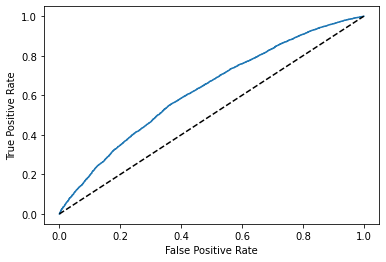

0.626310773567564
0.5932089909134385


In [32]:
#-------------------------------- Model testing ---------------------------------#

# Type your code here to predict for X_test data set using the fitted model
# Use a probability threshold to classify customers as churners and non churners (Default = 0.5)

# Predict the label of new_customer using default
y_pred=Lr.predict(X_test)

# Score the model
Lr.score(X_train,y_train)

# Score the model with test set
Lr.score(X_test,y_test)

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print confusion matrix
print(confusion_matrix(y_test,y_pred))

# Import precision_score
from sklearn.metrics import precision_score

# Print the precision
print(precision_score(y_test,y_pred))

# Import recall_score
from sklearn.metrics import recall_score

# Print the recall
print(recall_score(y_test, y_pred))

# Generate the probabilities
y_pred_prob = Lr.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr,tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test,y_pred_prob))

# f1score = 2 * (precision * recall) / (precision + recall) to account for trade off between precision and sensitivity
# Import f1_score
from sklearn.metrics import f1_score

# Print the F1 score
print(f1_score(y_test,y_pred))

### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [33]:
#-------------------------------- Model training -------------------------------#

# Type your code to build random forest classifier model on training data set

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train,y_train)

# Compute accuracy
print(clf.score(X_train, y_train))

RandomForestClassifier()

1.0


1.0

0.8905620563974679

[[9846  763]
 [1519 8724]]
0.9195741541056183
0.8517036024602167


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

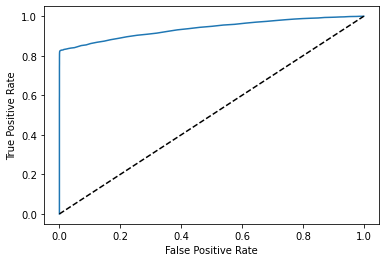

0.9382719448000816
0.884338570704511


In [34]:
#-------------------------------- Model testing ---------------------------------#

# Type your code here to predict for X_test data set using the fitted RF model

# Predict the label of new_customer using default
y_pred=clf.predict(X_test)

# Score the model
clf.score(X_train,y_train)

# Score the model with test set
clf.score(X_test,y_test)

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print confusion matrix
print(confusion_matrix(y_test,y_pred))

# Import precision_score
from sklearn.metrics import precision_score

# Print the precision
print(precision_score(y_test,y_pred))

# Import recall_score
from sklearn.metrics import recall_score

# Print the recall
print(recall_score(y_test, y_pred))

# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr,tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test,y_pred_prob))

# f1score = 2 * (precision * recall) / (precision + recall) to account for trade off between precision and sensitivity

# Import f1_score
from sklearn.metrics import f1_score

# Print the F1 score
print(f1_score(y_test,y_pred))

<mark>__Result:__
    
Type your answer from the model building exercise here, i.e., which model has better accuracy and using what metrics?
    
    RandomForest has a better accuracy based on the above graph where the model accuracy is about 90%.

### Q4.3 Identify most important features impacting churn

<Figure size 360x720 with 0 Axes>

Text(0.5, 1.0, 'feature Importance plot')

<AxesSubplot:title={'center':'feature Importance plot'}>

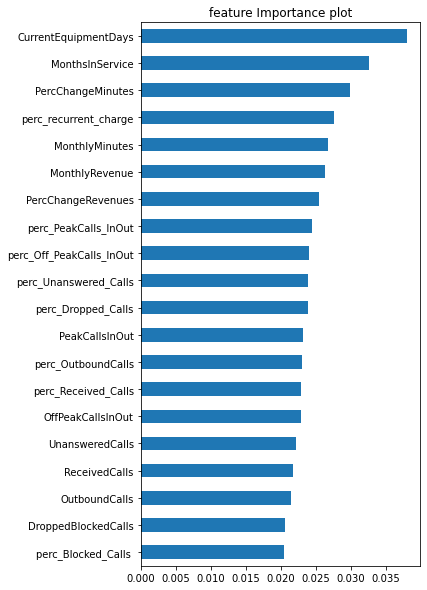

In [35]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created

feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
plt.figure(figsize=(5,10))
plt.title("feature Importance plot")
feat_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh',)
# .nlargest(20).sort(ascending=False)